# Eth2 Validator Economics Model: State Space Experiment Analysis

## Setup

Import the setup module, which runs shared notebook configuration methods, such as loading IPython modules:

In [1]:
import setup

time: 13.1 ms (started: 2021-04-30 12:46:57 +02:00)


## Dependencies

Import notebook specific depependencies:

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

pd.options.plotting.backend = "plotly"

time: 802 ms (started: 2021-04-30 12:46:57 +02:00)


In [3]:
from experiments.run import run
from experiments.post_processing import post_process
import visualizations as visualizations

time: 618 ms (started: 2021-04-30 12:46:58 +02:00)


## Experiment

Import the experiment to be run and analysed in this notebook:

In [4]:
from experiments.state_space.experiment import experiment

time: 566 ms (started: 2021-04-30 12:46:58 +02:00)


Run the experiment, and get the raw results:

In [5]:
results, _exceptions = run(experiment)

2021-04-30 12:46:59,500 - root - INFO - Running experiment
2021-04-30 12:46:59,597 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-04-30 12:47:04,447 - root - INFO - Experiment complete
time: 4.97 s (started: 2021-04-30 12:46:59 +02:00)


Convert the raw results to a Pandas DataFrame, and post-process the results:

In [65]:
df = pd.DataFrame(results)
df = post_process(df)
df

phase                  timestamp    eth_price    eth_supply  eth_staked  \
1       2.0 2021-04-30 12:46:58.781560  1543.699614  1.155524e+08   3897408.0   
2       2.0 2021-05-01 12:46:58.781560  1549.062354  1.155668e+08   3919168.0   
3       2.0 2021-05-02 12:46:58.781560  1532.438028  1.155812e+08   3940768.0   
4       2.0 2021-05-03 12:46:58.781560  1550.542308  1.155956e+08   3962368.0   
5       2.0 2021-05-04 12:46:58.781560  1589.995858  1.156100e+08   3983968.0   
...     ...                        ...          ...           ...         ...   
1796    4.0 2026-03-30 12:46:58.781560  1608.960843  1.097199e+08  42669568.0   
1797    4.0 2026-03-31 12:46:58.781560  1587.478400  1.097155e+08  42691168.0   
1798    4.0 2026-04-01 12:46:58.781560  1571.514388  1.097111e+08  42712768.0   
1799    4.0 2026-04-02 12:46:58.781560  1543.299242  1.097068e+08  42734368.0   
1800    4.0 2026-04-03 12:46:58.781560  1502.867694  1.097024e+08  42755968.0   

      supply_inflation  pow_issuance  \
1             0.042834     60.222222   
2             0.045521     60.222222   
3             0.045523     60.222222   
4             0.045524     60.222222   
5             0.045525     60.222222   
...                ...           ...   
1796         -0.014502      0.000000   
1797         -0.014498      0.000000   
1798         -0.014494      0.000000   
1799         -0.014490      0.000000   
1800         -0.014486      0.000000   

      number_of_validators_in_activation_queue  average_effective_balance  \
1                                            5               3.200000e+10   
2                                            0               3.200000e+10   
3                                            0               3.200000e+10   
4                                            0               3.200000e+10   
5                                            0               3.200000e+10   
...                                        ...                        ...   
1796                                         0               3.200000e+10   
1797                                         0               3.200000e+10   
1798                                         0               3.200000e+10   
1799                                         0               3.200000e+10   
1800                                         0               3.200000e+10   

      number_of_validators  ...  supply_inflation_pct  \
1                   121794  ...              4.283427   
2                   122474  ...              4.552123   
3                   123149  ...              4.552270   
4                   123824  ...              4.552390   
5                   124499  ...              4.552508   
...                    ...  ...                   ...   
1796               1333424  ...             -1.450243   
1797               1334099  ...             -1.449826   
1798               1334774  ...             -1.449411   
1799               1335449  ...             -1.448994   
1800               1336124  ...             -1.448579   

      total_revenue_yields_pct  total_profit_yields_pct  \
1                     7.981329                 7.447975   
2                     7.958076                 7.426332   
3                     7.934626                 7.403042   
4                     7.911354                 7.382230   
5                     7.887906                 7.362577   
...                        ...                      ...   
1796                  5.034927                 4.664831   
1797                  5.033595                 4.662241   
1798                  5.032268                 4.659975   
1799                  5.030938                 4.656879   
1800                  5.029615                 4.652872   

      total_online_validator_rewards_eth  total_tips_to_validators_eth  \
1                             851.662388                         0.000   
2                             853.922287                         0.000   
3          

time: 669 ms (started: 2021-04-30 13:48:38 +02:00)


## Analysis

Analyze and visualize the results:

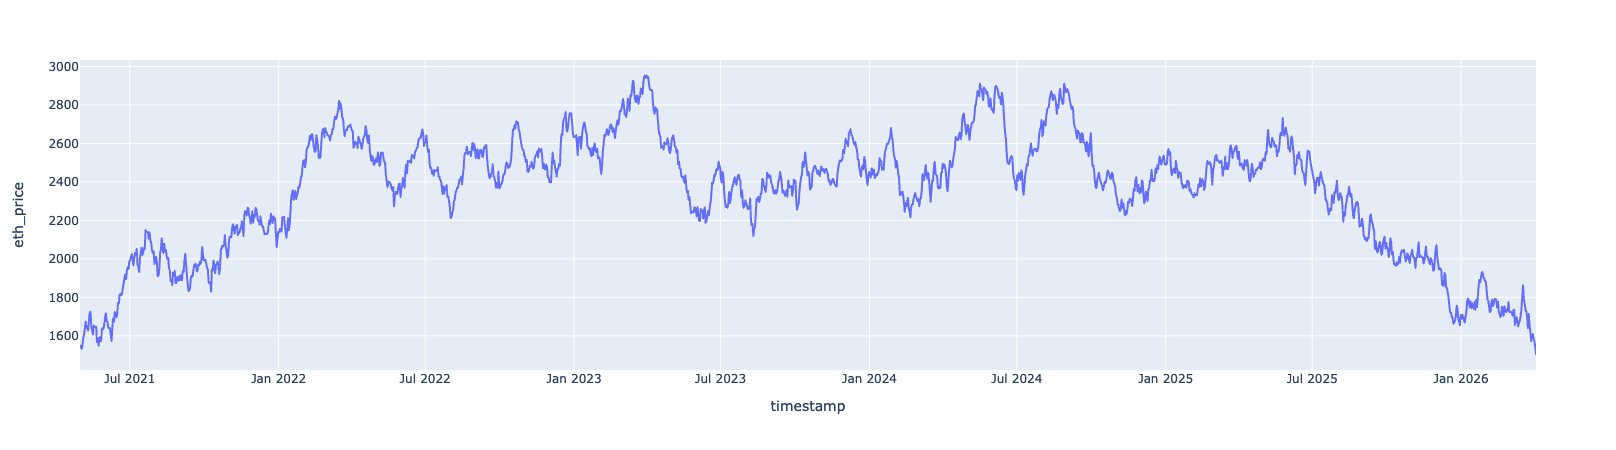

time: 152 ms (started: 2021-04-30 13:46:37 +02:00)


In [56]:
df.plot(x='timestamp', y='eth_price')

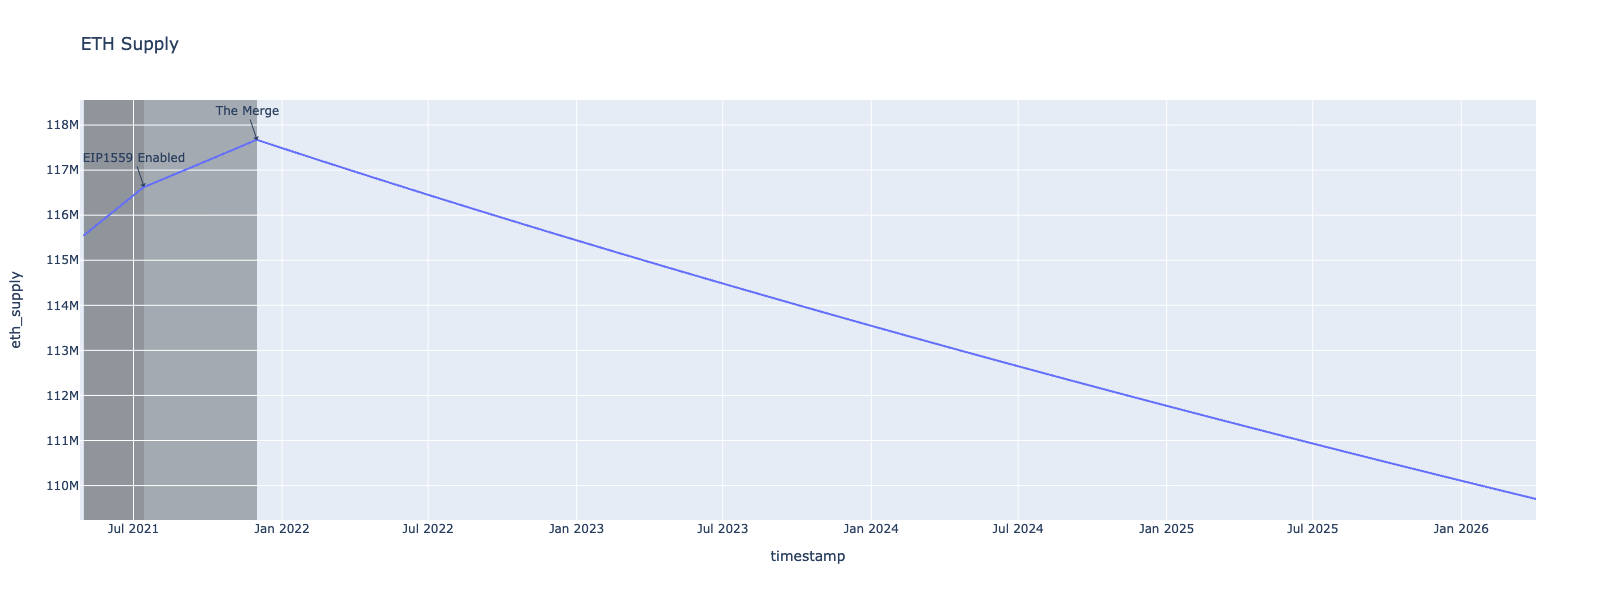

time: 172 ms (started: 2021-04-30 13:49:11 +02:00)


In [69]:
from model.parameters import parameters

df.reset_index(inplace=True)
df = df.set_index('timestamp')

date_start = parameters["date_start"][0]
date_eip1559 = parameters["date_eip1559"][0]
date_merge = parameters["date_merge"][0]
date_end = df.index[0]

fig = df.plot(y='eth_supply', title='ETH Supply', width=1000, height=600)

fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=date_start,
    y0=0,
    x1=date_eip1559,
    y1=1,
    line=dict(color="rgba(0,0,0,0)",width=3,),
    fillcolor="rgba(0,0,0,0.3)",
    layer='below'
)

fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=date_eip1559,
    y0=0,
    x1=date_merge,
    y1=1,
    line=dict(color="rgba(0,0,0,0)",width=3,),
    fillcolor="rgba(0,0,0,0.2)",
    layer='below'
)

fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=date_merge,
    y0=0,
    x1=date_end,
    y1=1,
    line=dict(color="rgba(0,0,0,0)",width=3,),
    fillcolor="rgba(0,0,0,0.1)",
    layer='below'
)

fig.add_annotation(
    x=date_eip1559, y=df.loc[date_eip1559.strftime("%Y-%m-%d")]['eth_supply'][0],
    text="EIP1559 Enabled",
    showarrow=True,
    arrowhead=1
)

fig.add_annotation(
    x=date_merge, y=df.loc[date_merge.strftime("%Y-%m-%d")]['eth_supply'][0],
    text="The Merge",
    showarrow=True,
    arrowhead=1,
)

df.reset_index(inplace=True)

fig.show()

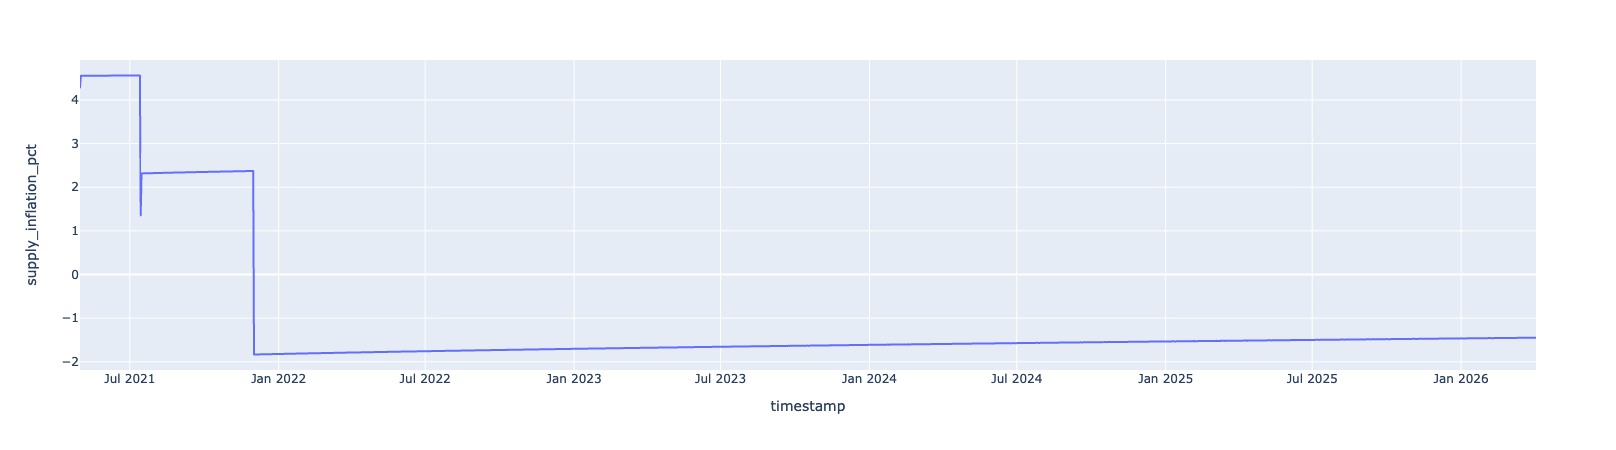

time: 155 ms (started: 2021-04-30 13:49:15 +02:00)


In [70]:
df.plot(x='timestamp', y='supply_inflation_pct')

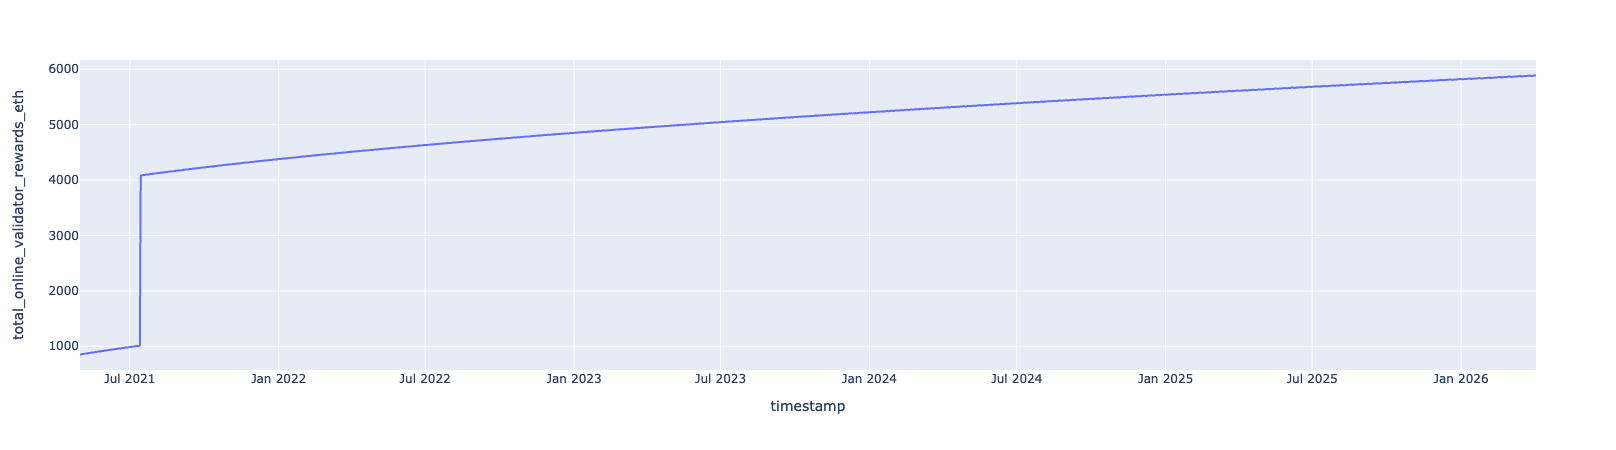

time: 160 ms (started: 2021-04-30 13:47:07 +02:00)


In [60]:
df.plot(x='timestamp', y='total_online_validator_rewards_eth')

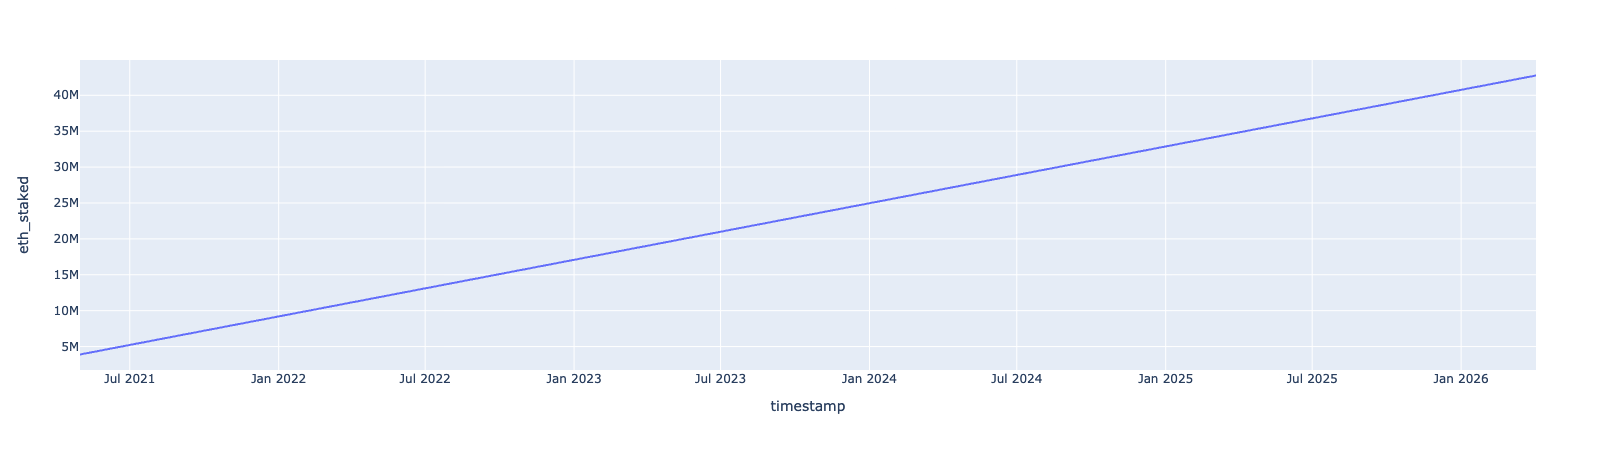

time: 152 ms (started: 2021-04-30 13:47:11 +02:00)


In [61]:
df.plot(x='timestamp', y='eth_staked')

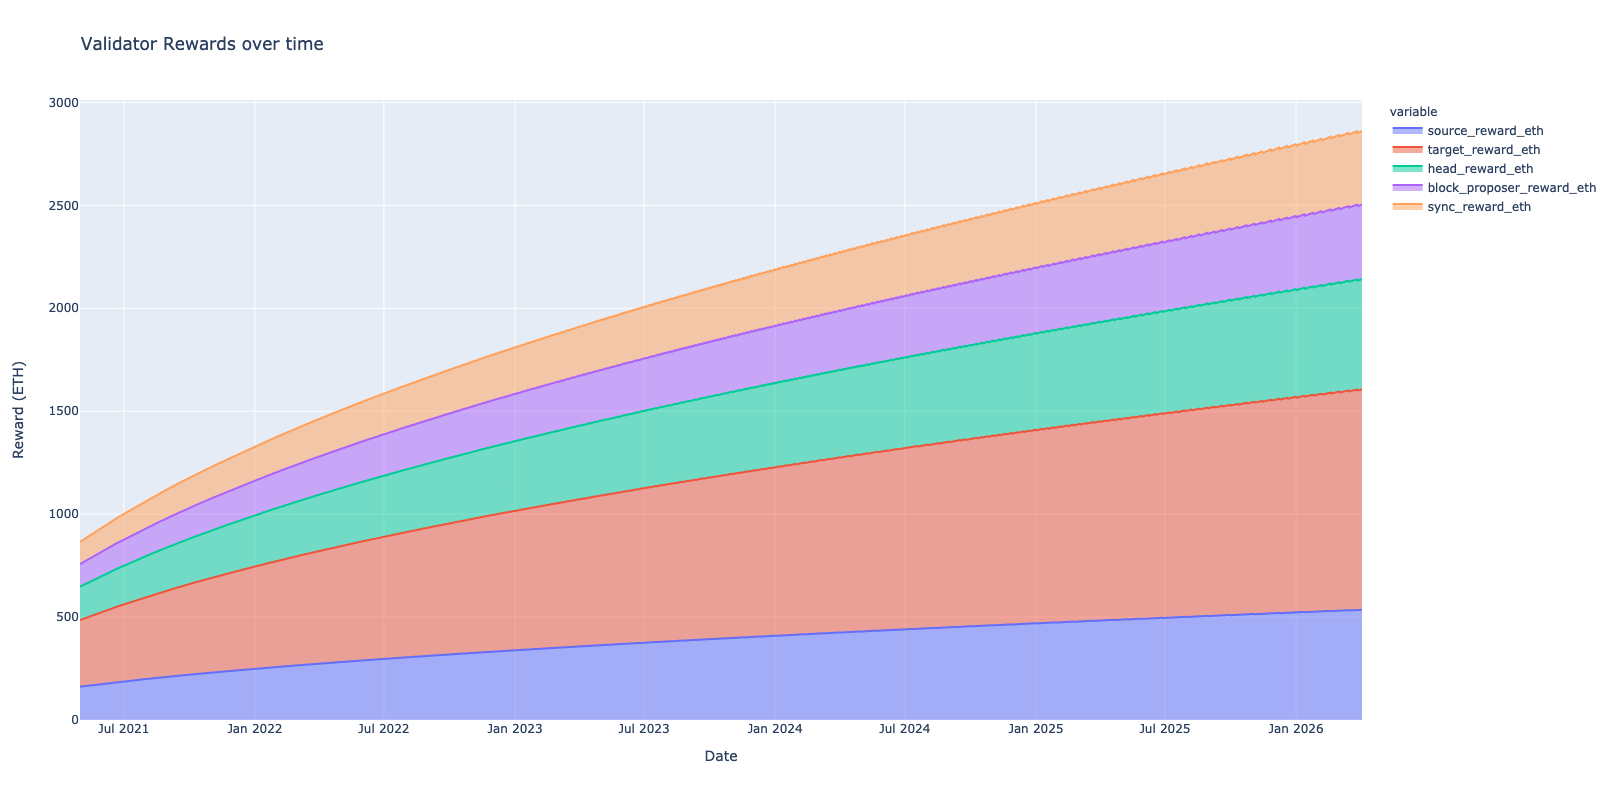

time: 767 ms (started: 2021-04-30 14:55:06 +02:00)


In [71]:
visualizations.plot_validator_rewards(df)

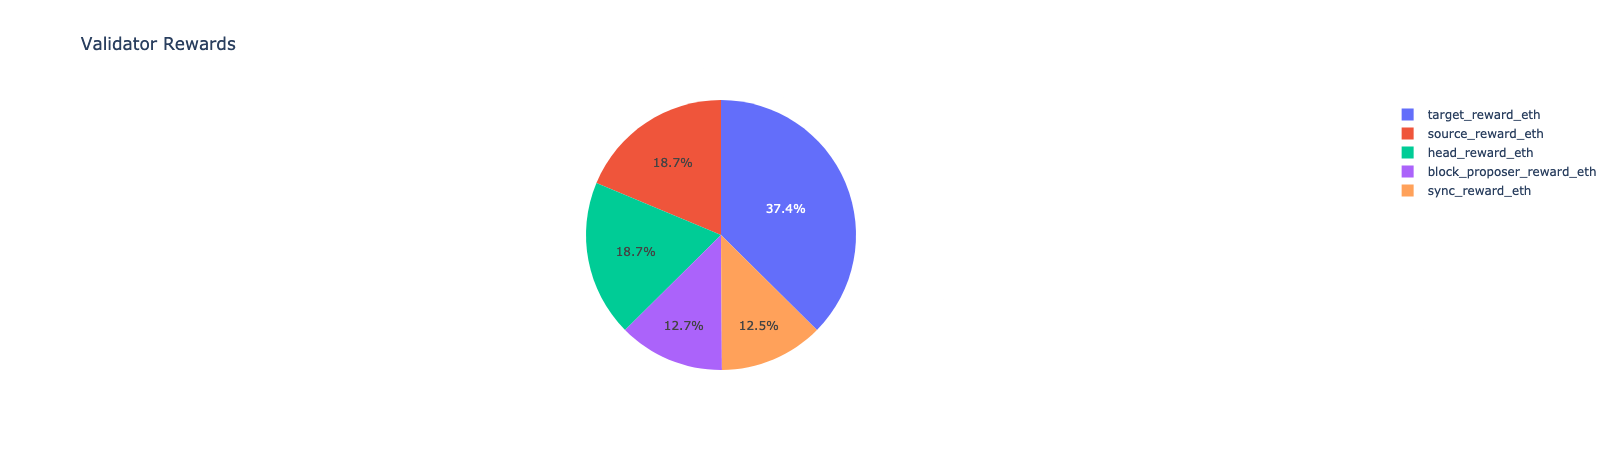

time: 79.9 ms (started: 2021-04-30 12:47:06 +02:00)


In [13]:
validator_rewards = df.iloc[-1][['source_reward_eth', 'target_reward_eth', 'head_reward_eth', 'block_proposer_reward_eth', 'sync_reward_eth']].to_dict()

px.pie(df, values=validator_rewards.values(), names=validator_rewards.keys(), title="Validator Rewards")

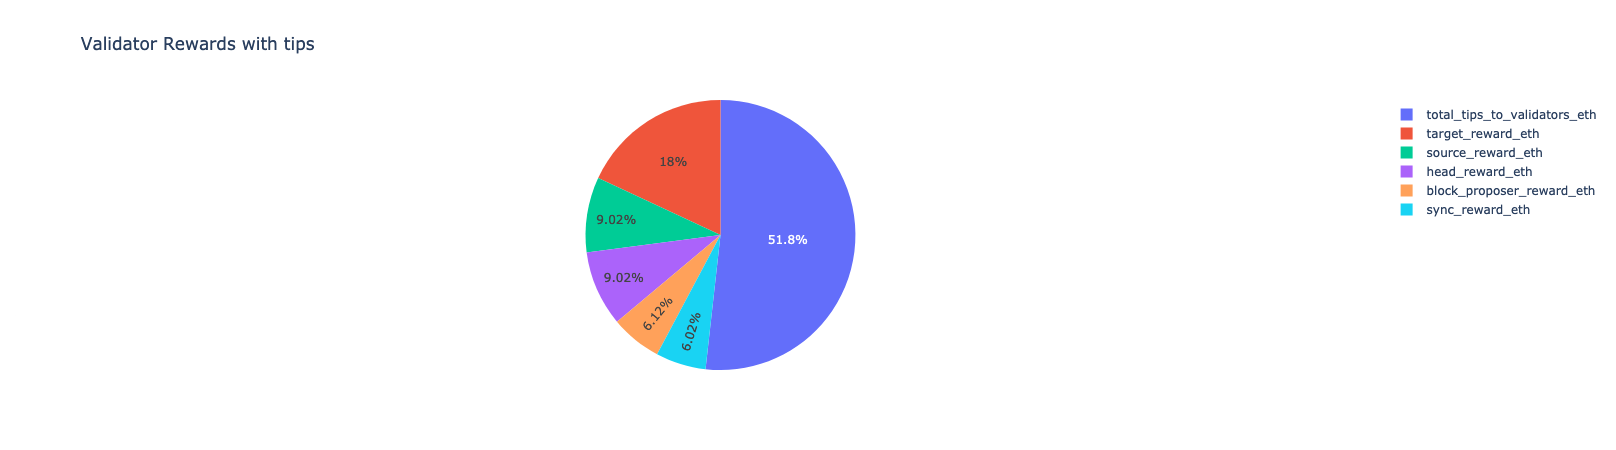

time: 73.6 ms (started: 2021-04-30 12:47:07 +02:00)


In [14]:
validator_rewards = df.iloc[-1][['total_tips_to_validators_eth', 'source_reward_eth', 'target_reward_eth', 'head_reward_eth', 'block_proposer_reward_eth', 'sync_reward_eth']].to_dict()

px.pie(df, values=validator_rewards.values(), names=validator_rewards.keys(), title="Validator Rewards with tips")

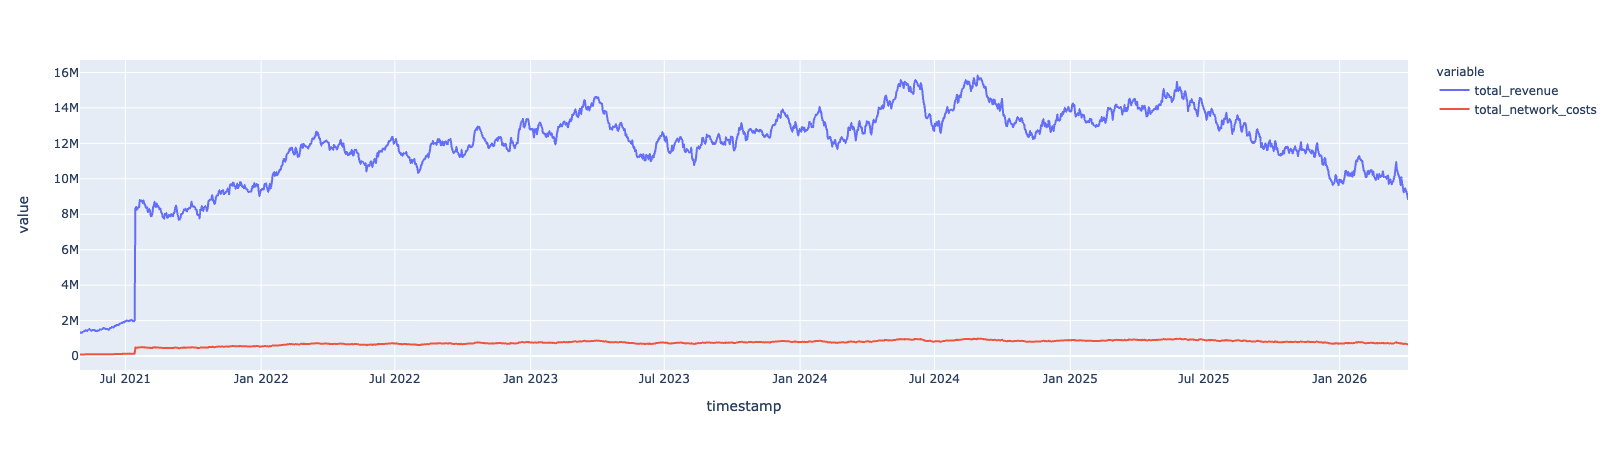

time: 228 ms (started: 2021-04-30 12:47:07 +02:00)


In [15]:
df.plot(x='timestamp', y=['total_revenue', 'total_network_costs'])

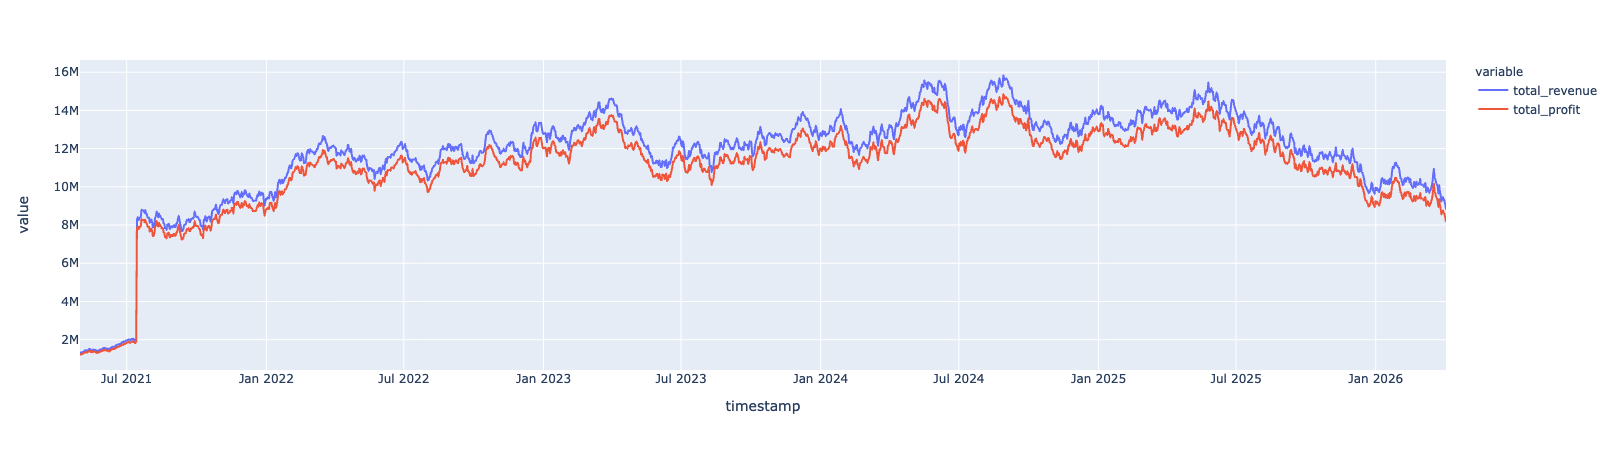

time: 212 ms (started: 2021-04-30 12:47:07 +02:00)


In [16]:
df.plot(x='timestamp', y=['total_revenue', 'total_profit'])

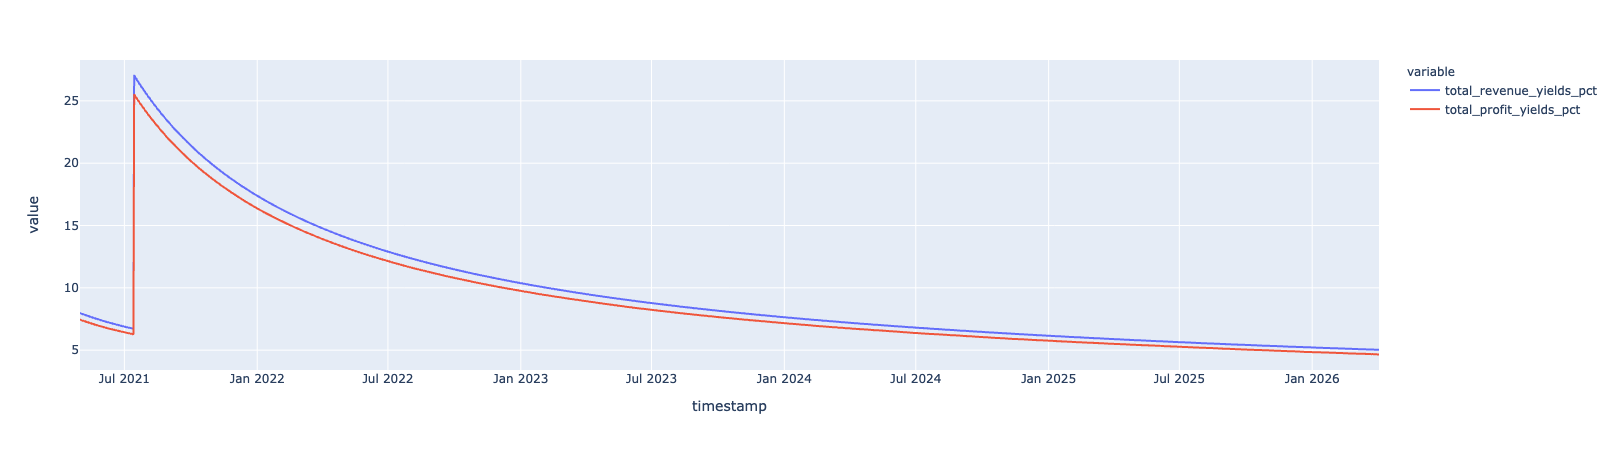

time: 232 ms (started: 2021-04-30 12:47:07 +02:00)


In [17]:
df.plot(x='timestamp', y=['total_revenue_yields_pct', 'total_profit_yields_pct'])

In [18]:
from model.parameters import validator_types

hardware_costs = [validator.type + '_hardware_costs' for validator in validator_types]
cloud_costs = [validator.type + '_cloud_costs' for validator in validator_types]
third_party_costs = [validator.type + '_third_party_costs' for validator in validator_types]

time: 31.5 ms (started: 2021-04-30 12:47:07 +02:00)


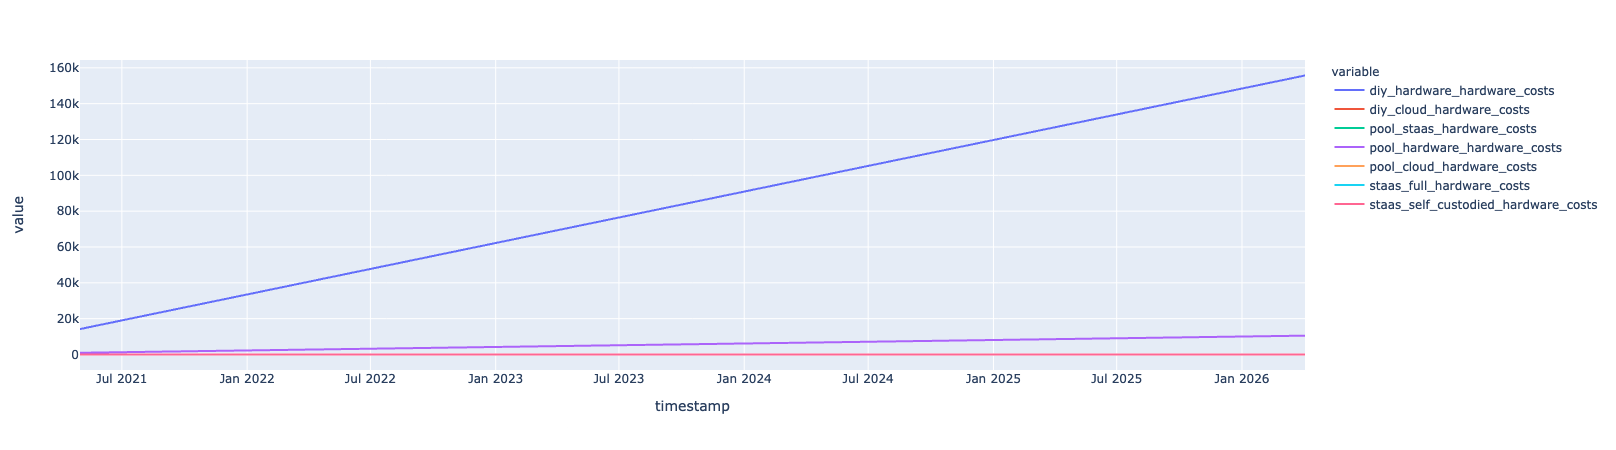

time: 564 ms (started: 2021-04-30 12:47:07 +02:00)


In [19]:
df.plot(x='timestamp', y=hardware_costs)

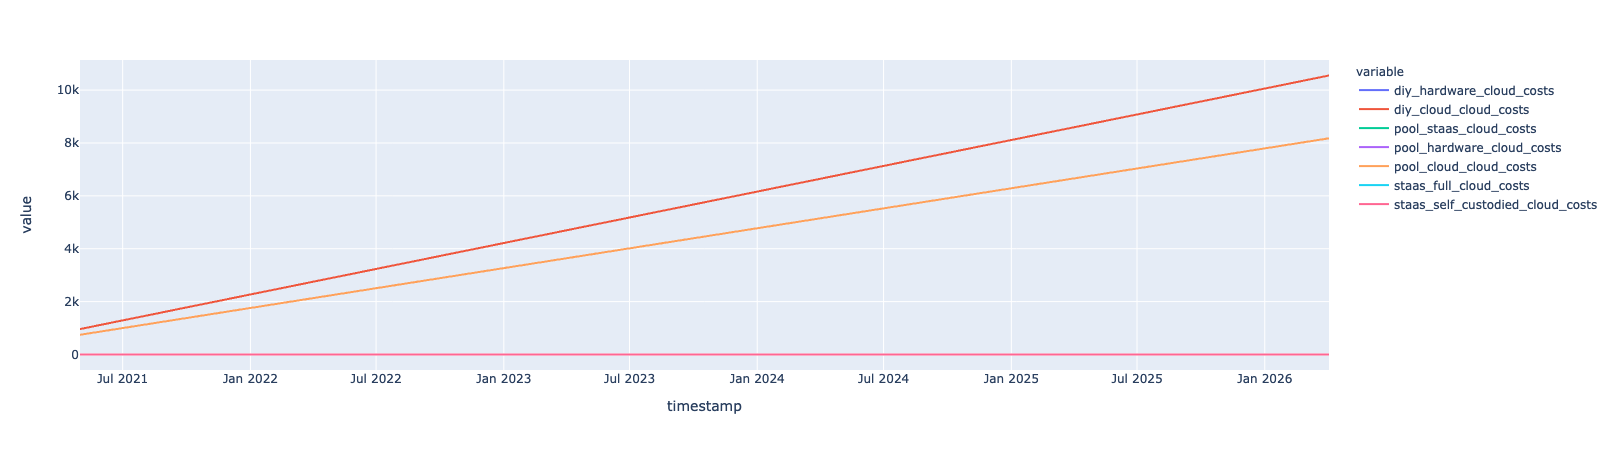

time: 557 ms (started: 2021-04-30 12:47:08 +02:00)


In [20]:
df.plot(x='timestamp', y=cloud_costs)

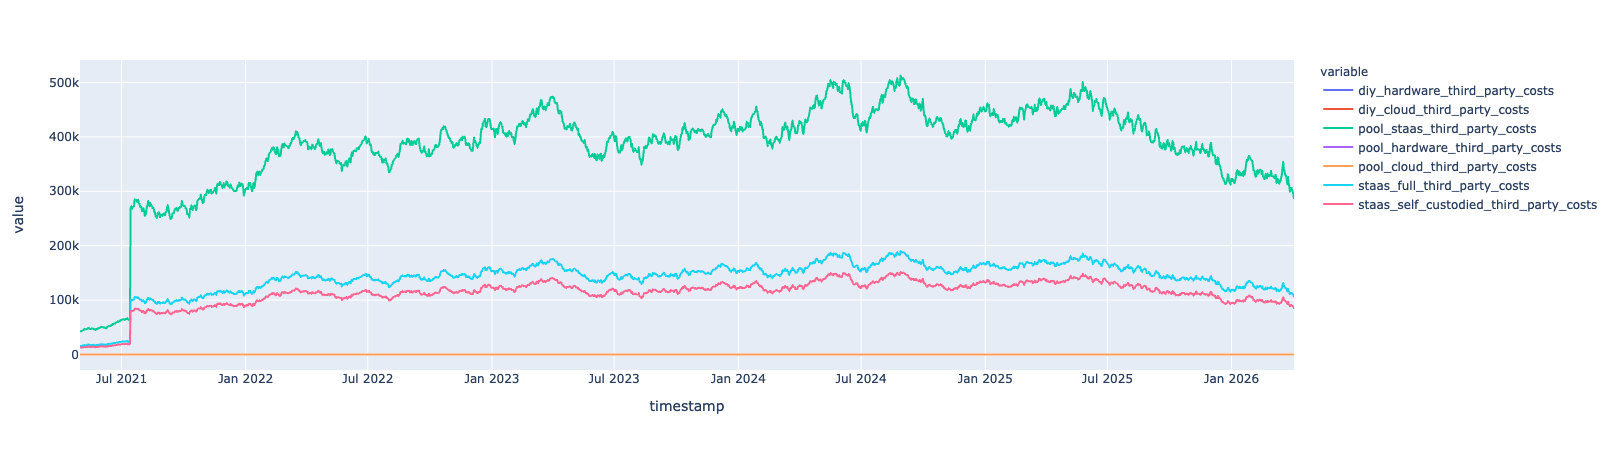

time: 656 ms (started: 2021-04-30 12:47:08 +02:00)


In [21]:
df.plot(x='timestamp', y=third_party_costs)